In [1]:
!pip install wordcloud

In [2]:
!pip install pythainlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 15.2 MB/s eta 0:00:00


In [3]:
!pip install deepcut

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.7 MB/s eta 0:00:00


In [4]:
import wordcloud
import deepcut
import pythainlp
from pythainlp import word_tokenize
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd

In [5]:
df = pd.read_csv('/content/IS2_OnlineComment_dataset.csv')
df.head()

,Texts,Label
0,GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา,"[[""GWM"", ""neg"", ""เทลูกค้า""],[""รถ"", ""neg"", ""มีป..."
1,Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120...,"[[""สเปคชาร์จไฟ"", ""neg"", [""ช้า"",""ความน่าสนใจลดล..."
2,Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM,"[[""Software"", ""neg"", ""บ้งเหมือนเดิม""], [""GWM"",..."
3,supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน,"[[""รถ"", ""pos"", ""supercarไฟฟ้า""]]"
4,ข้างนอกสวย ข้างในอย่างเชยยย,"[[""ข้างนอก"", ""pos"", ""สวย""],[""ข้างใน"", ""neg"", ""..."


# Data Cleaning

In [26]:
!pip install -q emoji pythainlp sefr_cut tinydb seqeval sentencepiece pydantic jsonlines

In [7]:
!pip install thaispellcheck

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.5 MB/s eta 0:00:00


In [10]:
#Ensure that no duplication of comments
df = df.drop_duplicates(subset=['Texts'])
print("numbers of comments:", df['Texts'].count())

numbers of comments: 2058


In [11]:
#Remove URL, hashtag,and emoji
from pythainlp.util import normalize
import thaispellcheck


emoji = re.compile("["
                   u"\U0001F600-\U0001F64F"  #Emoticons
                   u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                   u"\U00002500-\U00002BEF"  #Chinese char
                   u"\U00002702-\U000027B0"
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                   u"\U0001f926-\U0001f937"
                   u"\U00010000-\U0010ffff"
                   u"\u2640-\u2642"
                   u"\u2600-\u2B55"
                   u"\u200d"
                   u"\u23cf"
                   u"\u23e9"
                   u"\u231a"
                   u"\ufe0f"  #Dingbats
                   u"\u3030"
                   u"\U0001F700-\U0001F77F"  # alchemical symbols
                   u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                   u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                   u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                   u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                   u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                   u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
                   u"\U0001F0D0-\U0001F0FF"  # Supplemental Arrows-D
                   u"\U0001F200-\U0001F251"  # Enclosed Ideographic Supplement
                   u"\U0001F004-\U0001F251"  # Miscellaneous Symbols and Pictographs
                   "]+", flags = re.UNICODE) #Flag option as Unicode

def removing(text):
  #text = re.sub(r"[^ก-๙]+", r" ", text)
  text = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text) #remove URLs
  text = re.sub(r'#\S+', '', text)  #remove hashtag
  text = re.sub(emoji, '', text)    #remove emoj
  return  text

In [12]:
df['Textclear'] = df.apply(lambda row: removing(row['Texts']), axis=1)
df.head()

,Texts,Label,Textclear
0,GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา,"[[""GWM"", ""neg"", ""เทลูกค้า""],[""รถ"", ""neg"", ""มีป...",GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา
1,Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120...,"[[""สเปคชาร์จไฟ"", ""neg"", [""ช้า"",""ความน่าสนใจลดล...",Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120...
2,Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM,"[[""Software"", ""neg"", ""บ้งเหมือนเดิม""], [""GWM"",...",Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM
3,supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน,"[[""รถ"", ""pos"", ""supercarไฟฟ้า""]]",supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน
4,ข้างนอกสวย ข้างในอย่างเชยยย,"[[""ข้างนอก"", ""pos"", ""สวย""],[""ข้างใน"", ""neg"", ""...",ข้างนอกสวย ข้างในอย่างเชยยย


**Text Normalization**

In [17]:
sample1 = df['Texts'][101]
sample2 = df['Texts'][4]
print("original sample1:", sample1)
print("Norm sample1:", normalize(sample1))
print()
print("original sample2:",sample2)
print("Norm sample2:", normalize(sample2))

original sample1: ออฟชั่นป้่าดดดดดราคานี้ยอม
Norm sample1: ออฟชั่นป่าดดดดดราคานี้ยอม

original sample2: ข้างนอกสวย ข้างในอย่างเชยยย
Norm sample2: ข้างนอกสวย ข้างในอย่างเชยยย


Normalize text can reduce only excessive vowels, not excessive alphabets

In [13]:
df['TextNorm'] = df.apply(lambda row: normalize(row['Textclear']), axis=1)  #df['Texts'].apply(normalize)
df.head()

,Texts,Label,Textclear,TextNorm
0,GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา,"[[""GWM"", ""neg"", ""เทลูกค้า""],[""รถ"", ""neg"", ""มีป...",GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา,GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา
1,Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120...,"[[""สเปคชาร์จไฟ"", ""neg"", [""ช้า"",""ความน่าสนใจลดล...",Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120...,Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120...
2,Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM,"[[""Software"", ""neg"", ""บ้งเหมือนเดิม""], [""GWM"",...",Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM,Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM
3,supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน,"[[""รถ"", ""pos"", ""supercarไฟฟ้า""]]",supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน,supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน
4,ข้างนอกสวย ข้างในอย่างเชยยย,"[[""ข้างนอก"", ""pos"", ""สวย""],[""ข้างใน"", ""neg"", ""...",ข้างนอกสวย ข้างในอย่างเชยยย,ข้างนอกสวย ข้างในอย่างเชยยย


**Spell Correction**

In [19]:
#compare between thaispellcheck and PyThaiNLP spell correct

text = "ข้างนอกสวย ข้างในอย่างเชยยย"

In [23]:
import time
import thaispellcheck
start_time = time.time()
check_text = thaispellcheck.check(text, autocorrect= True)
end_time = time.time()

print(check_text)
print("Execution time:", end_time - start_time, "seconds")

ข้างนอกสวย ข้างในอย่างเลยยย
Execution time: 0.016394853591918945 seconds


In [24]:
from pythainlp.spell import correct

start_time = time.time()
corrected_text = correct(text)
end_time = time.time()

print(corrected_text)
print("Execution time:", end_time - start_time, "seconds")

ข้างนอกสวย ข้างในอย่างเชยยย
Execution time: 20.12757921218872 seconds


Not apply spell correction in this study as one changed the context meaning and another showed no change.

# Data Exploration

**Compare tokenizers via word_tokenize**

In [ ]:
testtxt ="ข้างนอกสวย ข้างในอย่างเชยยย"

In [ ]:
word_tokenize(testtxt, engine="newmm",keep_whitespace=False) #(default) - dictionary-based, Maximum Matching + Thai Character Cluster

['ข้างนอก', 'สวย', 'ข้างใน', 'อย่าง', 'เชย', 'ยย']

In [ ]:
word_tokenize(testtxt, engine="deepcut",keep_whitespace=False) #wrapper for DeepCut, learning-based approach

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


['ข้าง', 'นอก', 'สวย', 'ข้าง', 'ใน', 'อย่าง', 'เชยยย']

In [ ]:
word_tokenize(testtxt, engine="longest",keep_whitespace=False) #dictionary-based, Longest Matching

['ข้างนอก', 'สวย', 'ข้างใน', 'อย่าง', 'เชย', 'ยย']

In [ ]:
word_tokenize(testtxt, engine="attacut",keep_whitespace=False) #wrapper for AttaCut., learning-based approach

['ข้าง', 'นอก', 'สวย', 'ข้าง', 'ใน', 'อย่าง', 'เชย', 'ยย']

--> Tokenizer "newmm" seems to make sense the most

**Find Max Token length:**

In [ ]:
#Find Max_tokens
df['token_count'] = df['TextNorm'].apply(lambda text: len(word_tokenize(text, engine="newmm")))
print(df[['TextNorm', 'token_count']])

                                               TextNorm  token_count
0                      GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา            9
1     Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120...           73
2      Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM           14
3             supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน           10
4                           ข้างนอกสวย ข้างในอย่างเชยยย            7
...                                                 ...          ...
2053    โลโก้ ด้านหน้า เหมือนทำใหม่ บางกว่าเดิม สวยขึ้น           14
2054  สวยดี ราคา น่าสนใจ แต่กลัวที่ชาจเวลาชนนี่ชาจต่...           22
2055  เหมาะกันรถครอบครัวจริงๆ ขับไกลไปเรื่อย นุ่มนั่...           46
2056  เหมือนรถพลาสติกเรยค่ะ กระจังหน้าเป็นแบบนี้ หรื...           32
2057                                        ออฟชั่นล้นๆ            4

[2058 rows x 2 columns]


In [ ]:
print("Max tokens length:", df['token_count'].max())

Max tokens length: 252


**Count unique tokens:**

Change text to text file to compatible with WorldCloud

In [ ]:
text = df['TextNorm']
text

,TextNorm
0,GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา
1,Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120...
2,Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM
3,supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน
4,ข้างนอกสวย ข้างในอย่างเชยยย
...,...
2053,โลโก้ ด้านหน้า เหมือนทำใหม่ บางกว่าเดิม สวยขึ้น
2054,สวยดี ราคา น่าสนใจ แต่กลัวที่ชาจเวลาชนนี่ชาจต่...
2055,เหมาะกันรถครอบครัวจริงๆ ขับไกลไปเรื่อย นุ่มนั่...
2056,เหมือนรถพลาสติกเรยค่ะ กระจังหน้าเป็นแบบนี้ หรื...


In [ ]:
text.to_csv('comments.txt', sep="\n", index=False, header = False)

In [ ]:
file_name = 'comments.txt'
with open(file_name, encoding = 'utf8') as f:
  s = f.read()
print(s)

GWM เทลูกค้าที่ซื้อแล้วรถมีปัญหา
Segment นี้แบรนอื่นรับไฟที่ตู้ DC กันระดับ 120kW - 150 kW กันไปหมดแล้ว และเป็นรถที่คนส่วนใหญ่ใช้วิ่งทางไกลออกต่างจังหวัด สเปคชาร์จไฟช้าๆแบบนี้ความน่าสนใจลดลงไปมากพอสมควร เหมาะกับสายชิลล์จัดๆประมานว่าชาร์จทีนึงร่วม 1 ชม. ก็ยังรับได้
Software บ้งเหมือนเดิม ไม่คิดจะแก้บ้างเลยหรอ GWM
supercarไฟฟ้าชัดๆๆเหลือราคาถ้าราคาดีน่าสน
ข้างนอกสวย ข้างในอย่างเชยยย
ข้างนอกสวย แต่ไม่ค่อยชอบภายใน
คันจริงสวยมากครับ ดูลงตัวดีครับ
ใครๆก็อาจจะมองว่าชอบรถคันนี้ดูสวยน่ารักดี แต่สำหรับผม ไม่ใช่เลย เพราะผมเป็นคนไม่ชอบหนอนสีๆที่เกาะตามใบไม้ ต้นดอกไม้ ตามันเป็นแบบนี้เลย ไอ้ชิเมโจได๋อ่ะ นั่นแหละ มันดูแหยงๆ ตามันโตๆ เอเลี่ยนๆ แบบนี้เลย ... ไม่น่ามอง แถมตาไฟแบบนี้ยังไปคล้ายกับตาไฟรถเบนซ์รุ่นเก่าๆที่ตกยุคไปแล้วด้วย รุ่นW210 อ่ะตาไปเอเลี่ยนแบบนี้เลย ไม่สวย ... ไม่พอ ล้อแม็คที่บอกว่าเป็นลายตีนแมวอ่ะ ผมมองไม่เหมือนตีนแมวเลย ผมมองเห็นเป็นรูๆ อะไรไม่รู้ดูน่ากลัว เหมือนอะมีบ้ามากกว่า ไม่ชอบรูๆเลย เอเลี่ยนอีกแล้ว .... สรุปแค่ภายนอก ก็ขัดสายตาผมแล้ว (แต่คนอื่นๆ หลายคนอาจจะชอบ)
ช่องใส่มือถือเหม

In [ ]:
s = s.strip()

In [ ]:
words = word_tokenize(s, engine="newmm", keep_whitespace=False)
print(words)

['GWM', 'เท', 'ลูกค้า', 'ที่', 'ซื้อ', 'แล้ว', 'รถ', 'มีปัญหา', '\n', 'Segment', 'นี้', 'แบ', 'รน', 'อื่น', 'รับ', 'ไฟ', 'ที่', 'ตู้', 'DC', 'กัน', 'ระดับ', '120', 'kW', '-', '150', 'kW', 'กัน', 'ไป', 'หมด', 'แล้ว', 'และ', 'เป็น', 'รถ', 'ที่', 'คน', 'ส่วนใหญ่', 'ใช้', 'วิ่ง', 'ทางไกล', 'ออก', 'ต่างจังหวัด', 'สเปค', 'ชาร์จ', 'ไฟ', 'ช้าๆ', 'แบบนี้', 'ความน่าสนใจ', 'ลดลง', 'ไป', 'มาก', 'พอสมควร', 'เหมาะกับ', 'สาย', 'ชิลล์', 'จัด', 'ๆ', 'ประ', 'มาน', 'ว่า', 'ชาร์จ', 'ที', 'นึง', 'ร่วม', '1', 'ชม.', 'ก็', 'ยัง', 'รับได้', '\n', 'Software', 'บ้ง', 'เหมือนเดิม', 'ไม่', 'คิด', 'จะ', 'แก้', 'บ้าง', 'เลย', 'หรอ', 'GWM', '\n', 'supercar', 'ไฟฟ้า', 'ชัด', 'ๆๆ', 'เหลือ', 'ราคา', 'ถ้า', 'ราคา', 'ดี', 'น่าสน', '\n', 'ข้างนอก', 'สวย', 'ข้างใน', 'อย่าง', 'เชย', 'ยย', '\n', 'ข้างนอก', 'สวย', 'แต่', 'ไม่ค่อย', 'ชอบ', 'ภายใน', '\n', 'คัน', 'จริง', 'สวย', 'มาก', 'ครับ', 'ดู', 'ลง', 'ตัวดี', 'ครับ', '\n', 'ใครๆ', 'ก็', 'อาจจะ', 'มองว่า', 'ชอบ', 'รถ', 'คัน', 'นี้', 'ดู', 'สวย', 'น่ารัก', 'ดี', 'แต่', 'สำหรับ

In [ ]:
print("Total tokens:", len(words))

42658

In [ ]:
unique_tokens = set(words)
num_unique_tokens = len(unique_tokens)

print("Number of unique tokens:", num_unique_tokens)
print("Unique tokens:", unique_tokens)

Number of unique tokens: 4574
Unique tokens: {',xxx,xxx', 'หมื่น', '899,000', 'เกิ๊น', 'ยัด', 'เสียงดัง', 'Supercharge', 'มือถือ', 'Volvo', 'รวน', 'บ่อยๆ', 'เก่า', 'นับ', 'ตอง', 'คู', 'Avatar', 'คาที่', 'เมื่อย', 'แรง', 'เปรียบ', 'เที่ยว', 'เกล็ด', 'เหมาะกับ', 'แม้กระทั่ง', 'คนละ', 'รัช', 'ซิ', 'leg', '210', 'WRV', 'Sedan', 'งด', 'รถนอน', 'iso', 'เสียง', 'คุ้มค่า', 'ย', 'ดิส', 'โมเดล', 'มลพิษ', 'kicks', 'หยุดนิ่ง', 'แนว', 'รีแบรนด์', 'การพัฒนา', 'ครั้งนี้', 'องศา', 'เต้ม', 'USB', 'ชาจน์', 'ปลาทอง', 'Good', 'ปลื้ม', 'สั่น', 'ฮะ', 'ดุม', 'หน่วย', 'Spin', 'เมีย', '!!', 'รอบ', '890', 'นิ่ง ๆ', 'เฟค', 'ผู้บริโภค', 'ตามหลัง', 'ฮฮนด้า', 'เค้า', 'หิน', 'ปล่อยของ', 'เครื่องยนต์', 'ขายของ', 'm', 'เจ๊ง', 'ระยะหลัง', 'โง่', '.Option', 'เม้น', 'ใจ', 'อ่ะ', 'เห้ย', 'ลัมโบร์กินี', 'คับแคบ', 'ระยะ', 'สันดาป', 'วู่ห', 'ย่อย', 'ขนาดเล็ก', 'ทีนี้', 'ขวัญใจ', 'driving', '60', 'ยี', 'Goodyear', 'แบะ', 'cost', 'Story', 'โย', 'มือจับ', 'ทรัค', 'เหลืออยู่', 'ข้อต่อ', 'map', 'โซล', 'กันกระเทือน', '450', 'เป็นแ

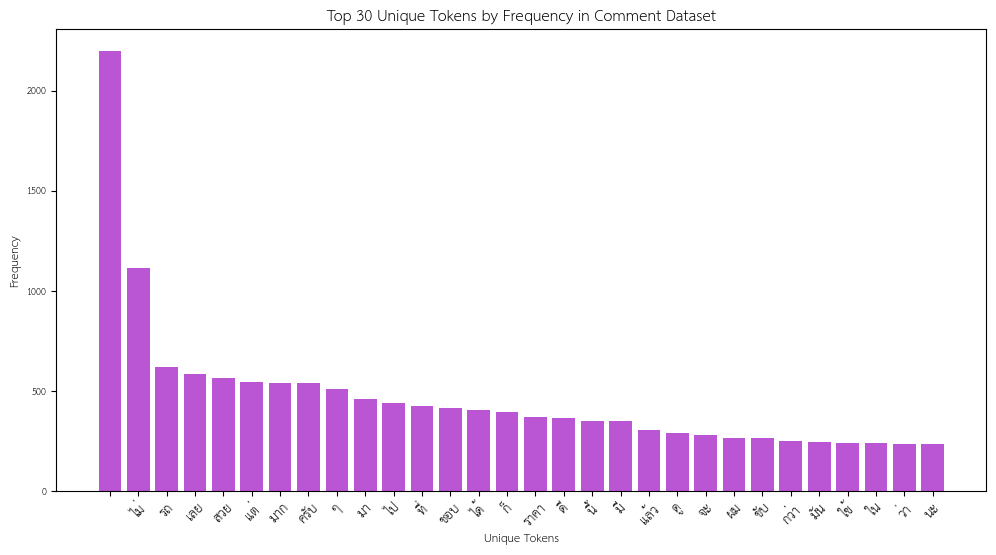

In [ ]:
#Create column chart to see Top 30 unique tokens
from collections import Counter
from matplotlib import font_manager

token_counts = Counter(words)
top_30_tokens = token_counts.most_common(30)  # Get top 20 tokens by frequency
unique_tokens, frequencies = zip(*top_30_tokens)  # Separate tokens and frequencies

# Create a column chart for the top 30 tokens
font_path = 'TH Sarabun New Regular.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

plt.figure(figsize=(12, 6))
plt.bar(unique_tokens, frequencies, color='mediumorchid')
plt.xlabel("Unique Tokens", fontproperties=font_prop,fontsize=12)
plt.ylabel("Frequency", fontproperties=font_prop,fontsize=12)
plt.title("Top 30 Unique Tokens by Frequency in Comment Dataset", fontproperties=font_prop,fontsize=16)
plt.xticks(rotation=45, fontproperties=font_prop, fontsize=14)
plt.show()

In [ ]:
x = Counter(words)
x.most_common()

[('\n', 2197),
 ('ไม่', 1116),
 ('รถ', 617),
 ('เลย', 586),
 ('สวย', 564),
 ('แต่', 544),
 ('มาก', 541),
 ('ครับ', 539),
 ('ๆ', 509),
 ('มา', 459),
 ('ไป', 439),
 ('ที่', 425),
 ('ชอบ', 414),
 ('ได้', 406),
 ('ก็', 394),
 ('ราคา', 370),
 ('ดี', 365),
 ('นี้', 352),
 ('มี', 351),
 ('แล้ว', 304),
 ('ดู', 289),
 ('จะ', 279),
 ('ผม', 266),
 ('ขับ', 264),
 ('กว่า', 250),
 ('มัน', 245),
 ('ใช้', 238),
 ('ใน', 238),
 ('ว่า', 237),
 ('นะ', 236),
 ('ให้', 209),
 ('ยัง', 207),
 ('กับ', 202),
 ('เป็น', 190),
 ('ถ้า', 189),
 ('ตัว', 181),
 ('ต้อง', 167),
 ('และ', 166),
 ('รุ่น', 158),
 ('ภายใน', 154),
 ('คัน', 150),
 ('"', 141),
 ('ของ', 134),
 ('คือ', 133),
 ('เยอะ', 131),
 ('ซื้อ', 125),
 ('เหมือน', 124),
 ('อยู่', 123),
 ('ล่าง', 122),
 ('จีน', 121),
 ('นั่ง', 120),
 ('ช่วง', 120),
 ('อย่าง', 116),
 ('จริงๆ', 116),
 ('แบบ', 113),
 ('แพง', 112),
 ('คน', 110),
 ('อีก', 110),
 ('น่า', 109),
 ('จริง', 107),
 ('หลัง', 106),
 ('เอา', 106),
 ('ดีกว่า', 104),
 ('สุด', 98),
 ('ดีมาก', 98),
 ('ทำ', 96),


In [ ]:
all_words = ' '.join(words).lower().strip()

In [ ]:
stopwords = {'ค่ะ','การ','ใคร','นี้','นี่','ทั้ง','อัน','แต่','ครับ','เลย','นะ','จะ','ก็','ผม', 'ถ้า', 'แล้ว','ๆ','ยัง', 'ที่','มัน','ว่า','พี่','เป็น','เอา','กับ','ไป','ให้','และ','กับ','ได้','คัน','รุ่น','ขาย','น่า','จริง', 'อยู่',
             'อีก','เหมือน','เห็น','ถึง','ไหน', 'หรือ','ซื้อ', 'ไทย','หน่อย','ทำไม','แค่','ปี',"การ","เรื่อง","ด้วย","หลาย","จาก","เคย","อย่าง",'ละ','ความ','เดียว','ทุก','เลยครับ','.','▁แต่','า','▁ถ้า',
             'มา','มาก','ใน','ดู','คิด','น่าจะ','แบบ','แบบนี้','ตัว','คน','คือ','เขา','ต้อง','ทำ','กัน','คง','ของ','เพราะ','จริงๆ','พอ','อะไร','กว่า','▁','?'}
print(type(stopwords))
print(stopwords)

<class 'set'>
{'า', 'ความ', 'เป็น', 'ใคร', 'ผม', 'อย่าง', 'เลย', 'แล้ว', 'อัน', 'ค่ะ', 'เดียว', 'มัน', 'พี่', 'น่าจะ', 'ขาย', 'ดู', 'เห็น', 'เอา', 'ที่', 'มาก', 'ก็', 'หลาย', 'ทุก', 'ไป', 'ต้อง', 'จริงๆ', 'กว่า', 'น่า', 'ทำไม', 'มา', 'นี้', 'พอ', 'ปี', 'ไหน', 'เรื่อง', 'ไทย', 'ถ้า', 'คน', 'อะไร', 'กัน', 'จาก', '?', '.', 'คิด', 'ให้', 'ซื้อ', 'นะ', 'คือ', 'ละ', 'เพราะ', 'และ', 'ได้', 'หน่อย', 'ๆ', 'จริง', 'นี่', 'อยู่', 'ถึง', 'การ', 'แค่', 'อีก', 'ครับ', 'หรือ', '▁ถ้า', 'แบบ', 'คง', 'ด้วย', 'เคย', '▁แต่', 'แบบนี้', 'ทั้ง', 'เขา', '▁', 'ว่า', 'ของ', 'ยัง', 'แต่', 'คัน', 'รุ่น', 'เหมือน', 'กับ', 'ใน', 'ทำ', 'จะ', 'ตัว', 'เลยครับ'}


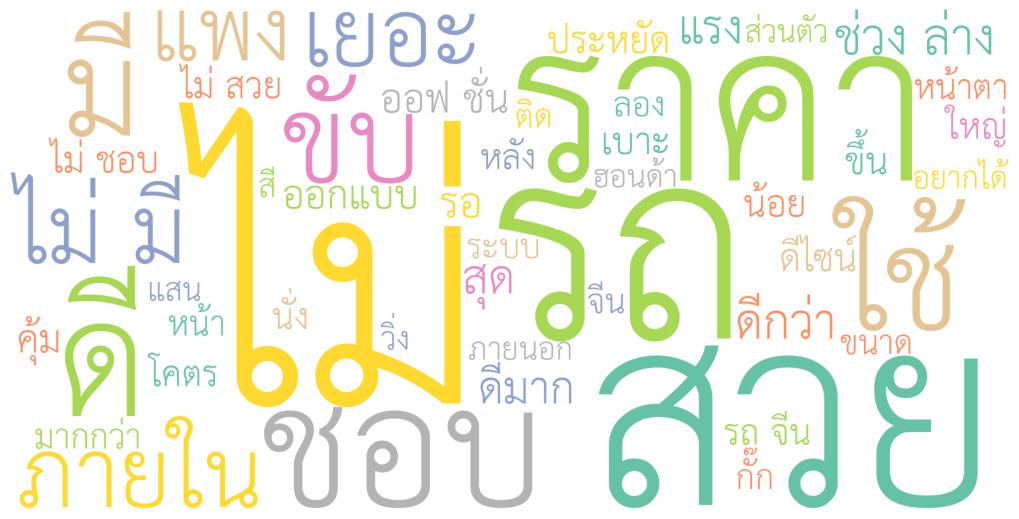

In [ ]:
wordcloud = WordCloud(
    font_path = 'TH Sarabun New Regular.ttf',
    regexp = '[ก-๙]+',

    stopwords = stopwords,
    width =2000, height=1000,

    prefer_horizontal=1, #ตัวอักษรแนวนอน 90% แนวตั้ง 10%
    max_words = 50, # Top 50 words

    colormap = 'Set2', # 'plasma', 'tab20c'
    background_color='white').generate(all_words)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
#plt.show

**Count Max prompt tokens**

In [ ]:
prompt = """You are a text analysis model. Your task is to extract aspects, sentiments, and opinion words from a given sentence that is an opinion about a newly launched car.
Task:
For each aspect in the sentence, you need to identify:
The aspect terms which are related to car (if explicitly present or inferred from context. If not explicitly mentioned,provide the most likely one based on the context).
The sentiment associated with the aspect ('pos' for positive, 'neg' for negative).
The opinion words related to each aspect. (if explicitly present or inferred from context. If not explicitly mentioned,provide the most likely one).
Then return the output in a format of a list of lists format without additional explanation in front or at the end of the list: [["aspect1", "sentiment1", "opinion_word1"], ["aspect2", "sentiment2", ["opinion_word2.1", "opinion_word2.2",...]], ...]
If a sentence has multiple aspects or opinions, list each aspect separately in the output.
The output should be a list of lists, where each inner list contains: The aspect term, the sentiment and the opinion words
Output only in the format without extra explanation or characters.

Example Outputs:
Input: "ดีไซน์สวยมาก แต่ราคาแพงเกิน"
Output: [["ดีไซน์", "pos", "สวย"], ["ราคา", "neg", "แพงเกิน"]]

Input: "สวย แรง ออปชั่นดี ติดอย่างเดียวเรื่องแบรนด์"
Output: [["ดีไซน์", "pos", "สวย"], ["เครื่องยนต์", "pos", "แรง"], ["ออปชั่น", "pos", "ดี"], ["แบรนด์", "neg", "ไม่ดี"]]

Input: "ทั้งวัสดุทั้งงานประกอบแย่มาก"
Output: [["วัสดุ", "neg", "แย่"], ["งานประกอบ", "neg", "แย่"]]

Input: "ดูแล้วเหมือนหัวจะชนหลังคาดูอึดอัด"
Output: [["พื้นที่ห้องโดยสาร", "neg", ["เหมือนหัวจะชนหลังคา","ดูอึดอัด"]]]

Input: "ถ้าเตี้ยแบบนี้ ลุยน้ำท่วมไม่รอดแน่"
Output: [["รถ", "neg", ["เตี้ย","ลุยน้ำท่วมไม่รอด"]]]

Input: "รถก็หล่อ พี่นิธิก็เท่ห์ วันนี้ใส่เสื้อฮาวายซะด้วย"
Output: [["รถ", "pos", "หล่อ"]]

Input: "Your sentence here"
Output:"""

In [ ]:
prompt_tokens = deepcut.tokenize(prompt)
token_count = len(prompt_tokens)
print("Number of tokens:", token_count)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Number of tokens: 765


In [ ]:
print("No. of Max_tokens parameter:", 765+252)

No. of Max_tokens parameter: 1017


Thus, Max_tokens should be set at 1,024